In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/Users/busraaltun/Desktop/consumer complaints/Consumer_Complaints.csv')

In [8]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Product                       777959 non-null  object
 2   Sub-product                   542822 non-null  object
 3   Issue                         777959 non-null  object
 4   Sub-issue                     320986 non-null  object
 5   Consumer complaint narrative  157865 non-null  object
 6   Company public response       197884 non-null  object
 7   Company                       777959 non-null  object
 8   State                         772056 non-null  object
 9   ZIP code                      772001 non-null  object
 10  Tags                          109264 non-null  object
 11  Consumer consent provided?    288311 non-null  object
 12  Submitted via                 777959 non-null  object
 13 

In [10]:
df.isna().sum()

Date received                        0
Product                              0
Sub-product                     235137
Issue                                0
Sub-issue                       456973
Consumer complaint narrative    620094
Company public response         580075
Company                              0
State                             5903
ZIP code                          5958
Tags                            668695
Consumer consent provided?      489648
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                9545
Complaint ID                         0
dtype: int64

In [11]:
df.nunique()

Date received                     1995
Product                             18
Sub-product                         75
Issue                              158
Sub-issue                          193
Consumer complaint narrative    154930
Company public response             10
Company                           4224
State                               62
ZIP code                         28420
Tags                                 3
Consumer consent provided?           4
Submitted via                        6
Date sent to company              1944
Company response to consumer         8
Timely response?                     2
Consumer disputed?                   2
Complaint ID                    777959
dtype: int64

In [12]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [13]:
df = df.fillna('no_info')

<AxesSubplot:ylabel='Product'>

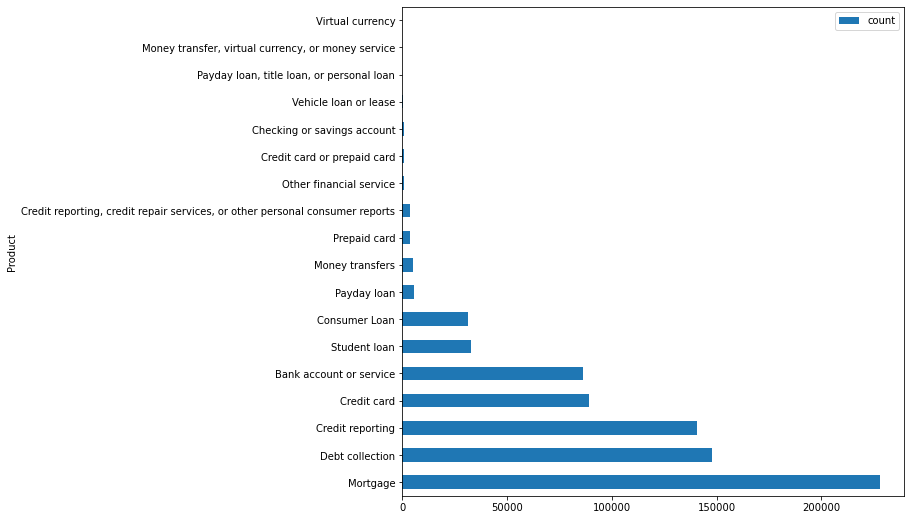

In [14]:
#Which product is the most problematic one?(1)


df.groupby('Product')['Complaint ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))

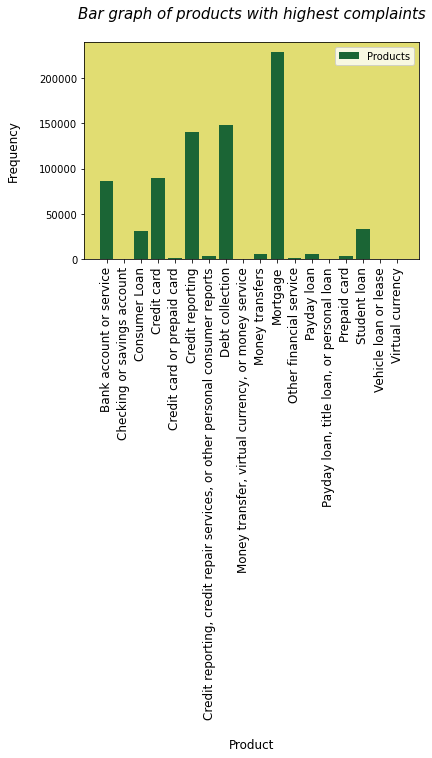

In [23]:
#Which product is the most problematic one?(2)


ax = plt.axes()
ax.set_facecolor('#e1dd72')
plt.bar(df.groupby(['Product']).size().index, 
        df.groupby(['Product']).size().values, label='Products', color='#1b6535')
plt.xlabel('\nProduct', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Frequency\n', fontsize=12)
plt.title('Bar graph of products with highest complaints\n', fontsize=15, fontstyle='italic')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Sub-product'>

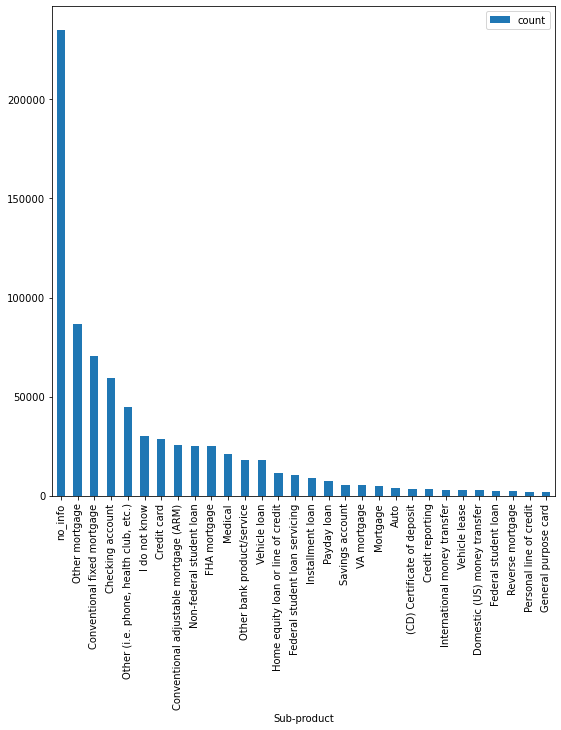

In [15]:
#Which Sub-product is the most problematic one?

df.groupby('Sub-product')['Complaint ID'].agg(['count']).sort_values(by='count',ascending=False).head(30).plot(kind='bar',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

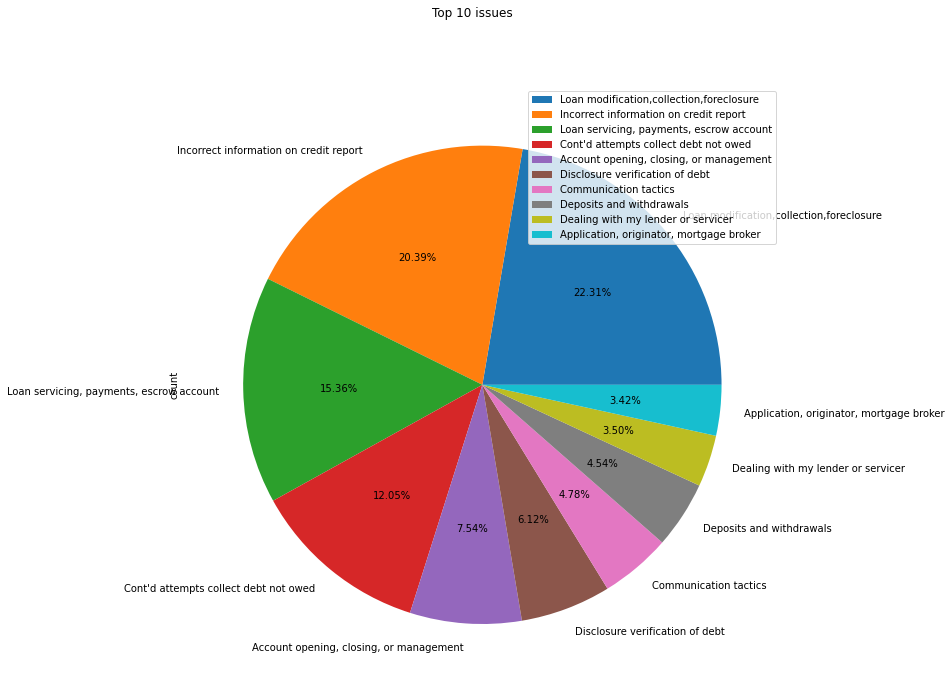

In [16]:
#What are the top 10 issues?

df.groupby('Issue')['Complaint ID'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 10 issues',figsize=(11,11))

<AxesSubplot:xlabel='Sub-issue'>

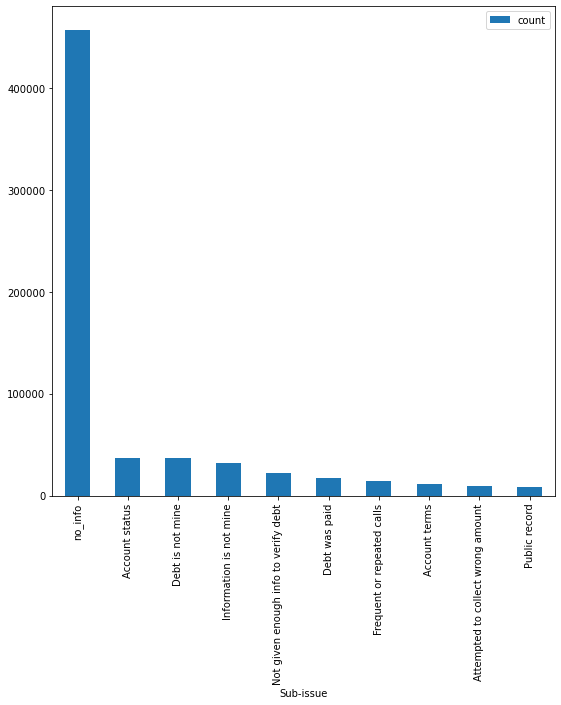

In [17]:
#What are the top Sub-issues?

df.groupby('Sub-issue')['Issue'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='bar',figsize=(9,9))

In [18]:
# Total number of company public response info 

df.groupby('Company public response')['Complaint ID'].agg(['count']).sort_values(by='count', ascending=False)

,count
Company public response,
no_info,580075
Company has responded to the consumer and the CFPB and chooses not to provide a public response,97492
Company chooses not to provide a public response,52473
Company believes it acted appropriately as authorized by contract or law,34323
Company believes the complaint is the result of a misunderstanding,3149
Company disputes the facts presented in the complaint,2887
Company believes complaint caused principally by actions of third party outside the control or direction of the company,2579
Company believes complaint is the result of an isolated error,2323
Company can't verify or dispute the facts in the complaint,1549


<AxesSubplot:ylabel='State'>

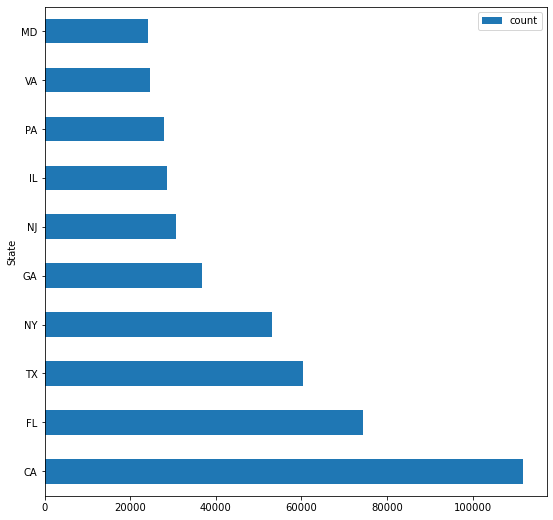

In [19]:
#Which states have the highest number of complaint?

df.groupby('State')['Complaint ID'].agg(['count']).sort_values(by='count', ascending=False).head(10).plot(kind='barh',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

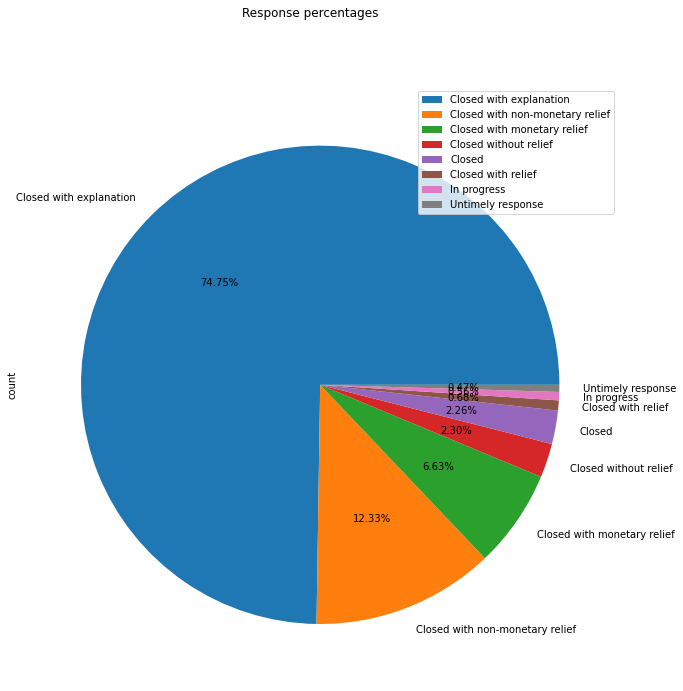

In [20]:
#Analyzing company response(1)

df.groupby('Company response to consumer')['Complaint ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Response percentages',figsize=(11,11))

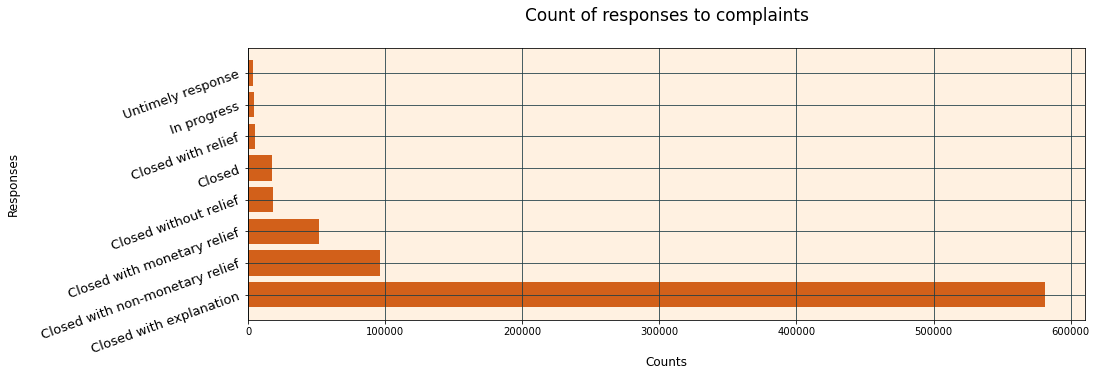

In [29]:
# Analyzing company response(2)


response_counts = df['Company response to consumer'].value_counts()
response = response_counts.index
counts = response_counts.values
plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.barh(response, counts, color='#d2601a')
plt.grid(color='#1d3c45')
ax.set_facecolor('#fff1e1')
plt.xlabel('\nCounts', fontsize=12)
plt.ylabel('Responses\n', fontsize=12)
plt.yticks(rotation=20, fontsize='13')
plt.title('Count of responses to complaints\n', fontsize=17)
plt.show()

<AxesSubplot:title={'center':'Top contested questions'}, xlabel='Issue'>

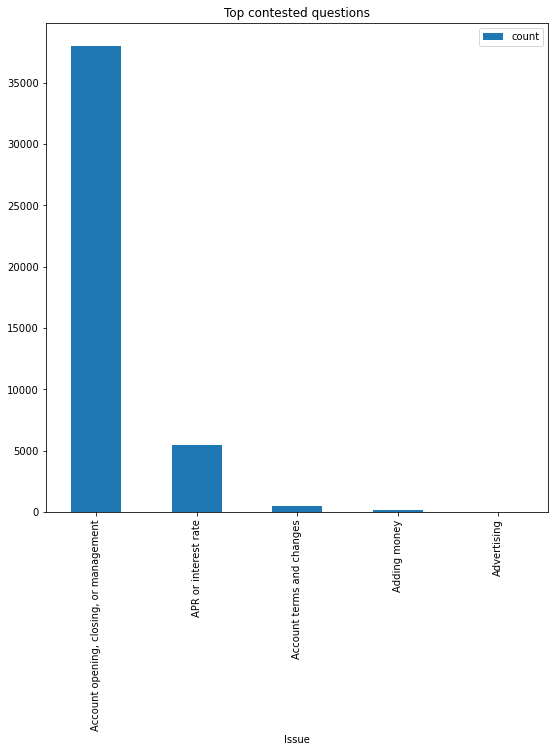

In [21]:
#The most frequently contested questions

df.groupby('Issue')['Consumer disputed?'].agg(['count']).head(5).sort_values(by='count',ascending=False).plot(kind='bar',title='Top contested questions',figsize=(9,9))

In [24]:
# Top 10 Companies depends on the number of complaints


company = df['Company'].value_counts().index
num_of_complaints = df['Company'].value_counts().values
company_df = pd.DataFrame({'Company': company, 'Number of complaints': num_of_complaints})
company_df.head(10)

,Company,Number of complaints
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",66314
1,"WELLS FARGO BANK, NATIONAL ASSOCIATION",54090
2,"EQUIFAX, INC.",49162
3,EXPERIAN DELAWARE GP,46896
4,JPMORGAN CHASE & CO.,42997
5,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",40752
6,"CITIBANK, N.A.",35028
7,OCWEN LOAN SERVICING LLC,24273
8,CAPITAL ONE FINANCIAL CORPORATION,20526
9,"Navient Solutions, LLC.",18384


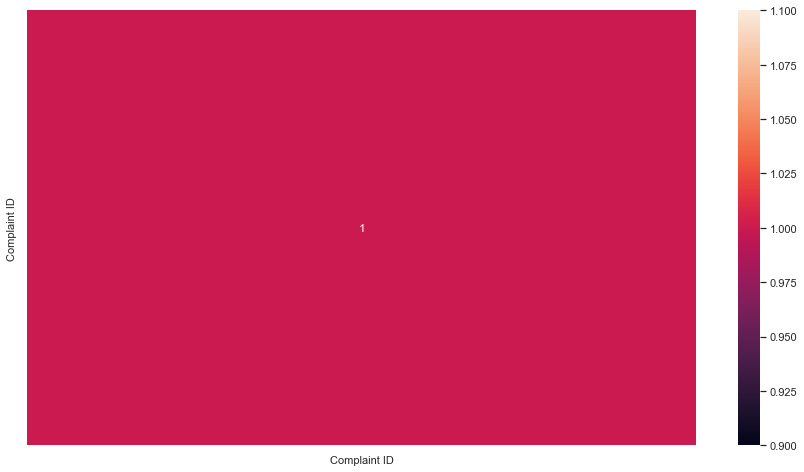

In [40]:
#Checking the correlations

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.#Which product is the most problematic one?(1)
corr(), annot=True);

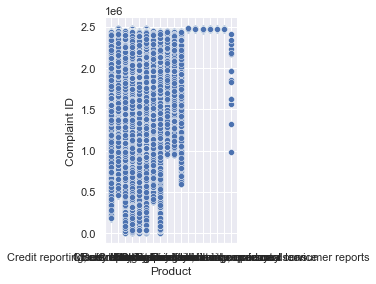

In [43]:
sns.pairplot(df, x_vars='Product', 
             y_vars='Complaint ID', height=4, aspect=1, kind='scatter')
plt.show()

In [44]:
#Building a model
x = df['Complaint ID']
y = df['Product']


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)
x_train
y_train

54933      Debt collection
503146         Credit card
489748     Debt collection
650412       Consumer Loan
742773         Payday loan
                ...       
718730         Credit card
212912            Mortgage
65615             Mortgage
210755    Credit reporting
56088             Mortgage
Name: Product, Length: 544571, dtype: object

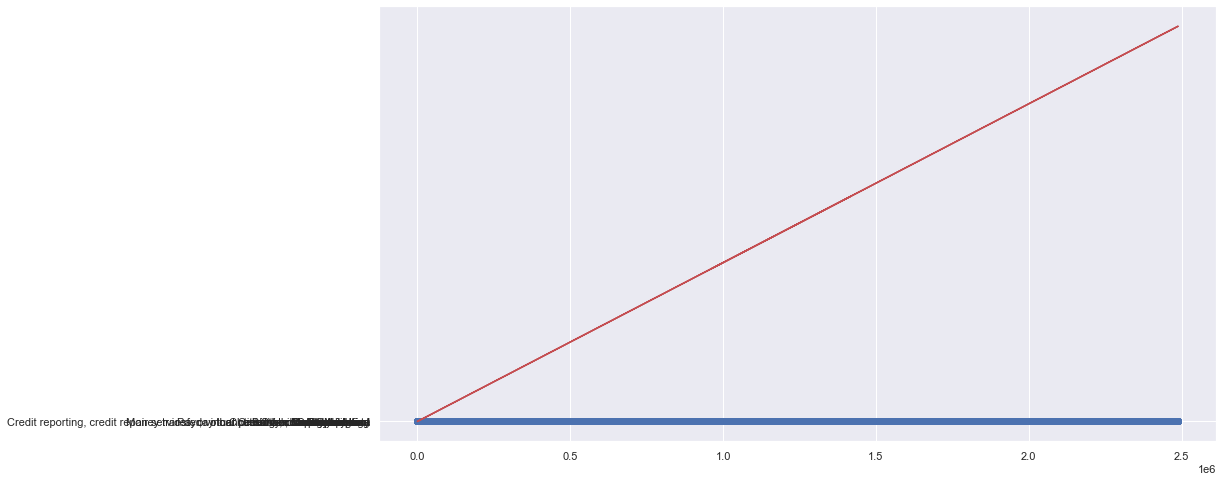

In [50]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -43206.067012+ 21.509716*x_train, 'r')
plt.show()